In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data science/Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop them
data = data.fillna(0)

# Remove duplicates
data = data.drop_duplicates()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can further analyze the coefficients and intercepts of the model:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 316517319524.9036
R-squared: 0.017498572820902725
Coefficients: [  -686.1591227  -22242.58413478  -1632.23208106 -43596.96980789]
Intercept: 1789909.7866092026


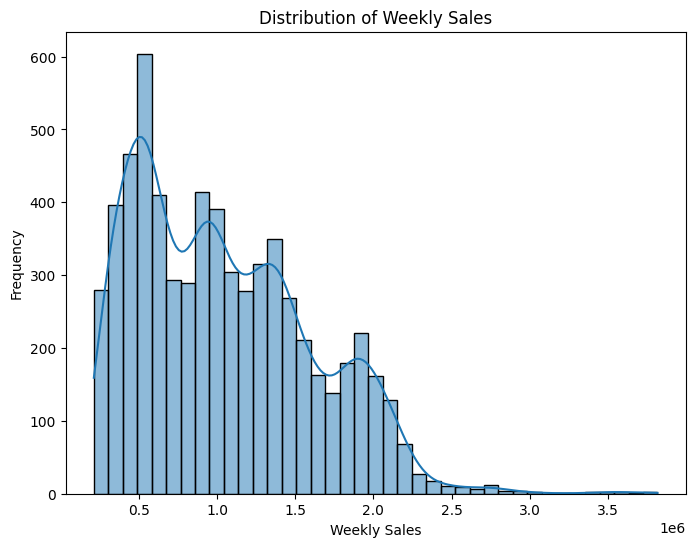

<Figure size 1200x800 with 0 Axes>

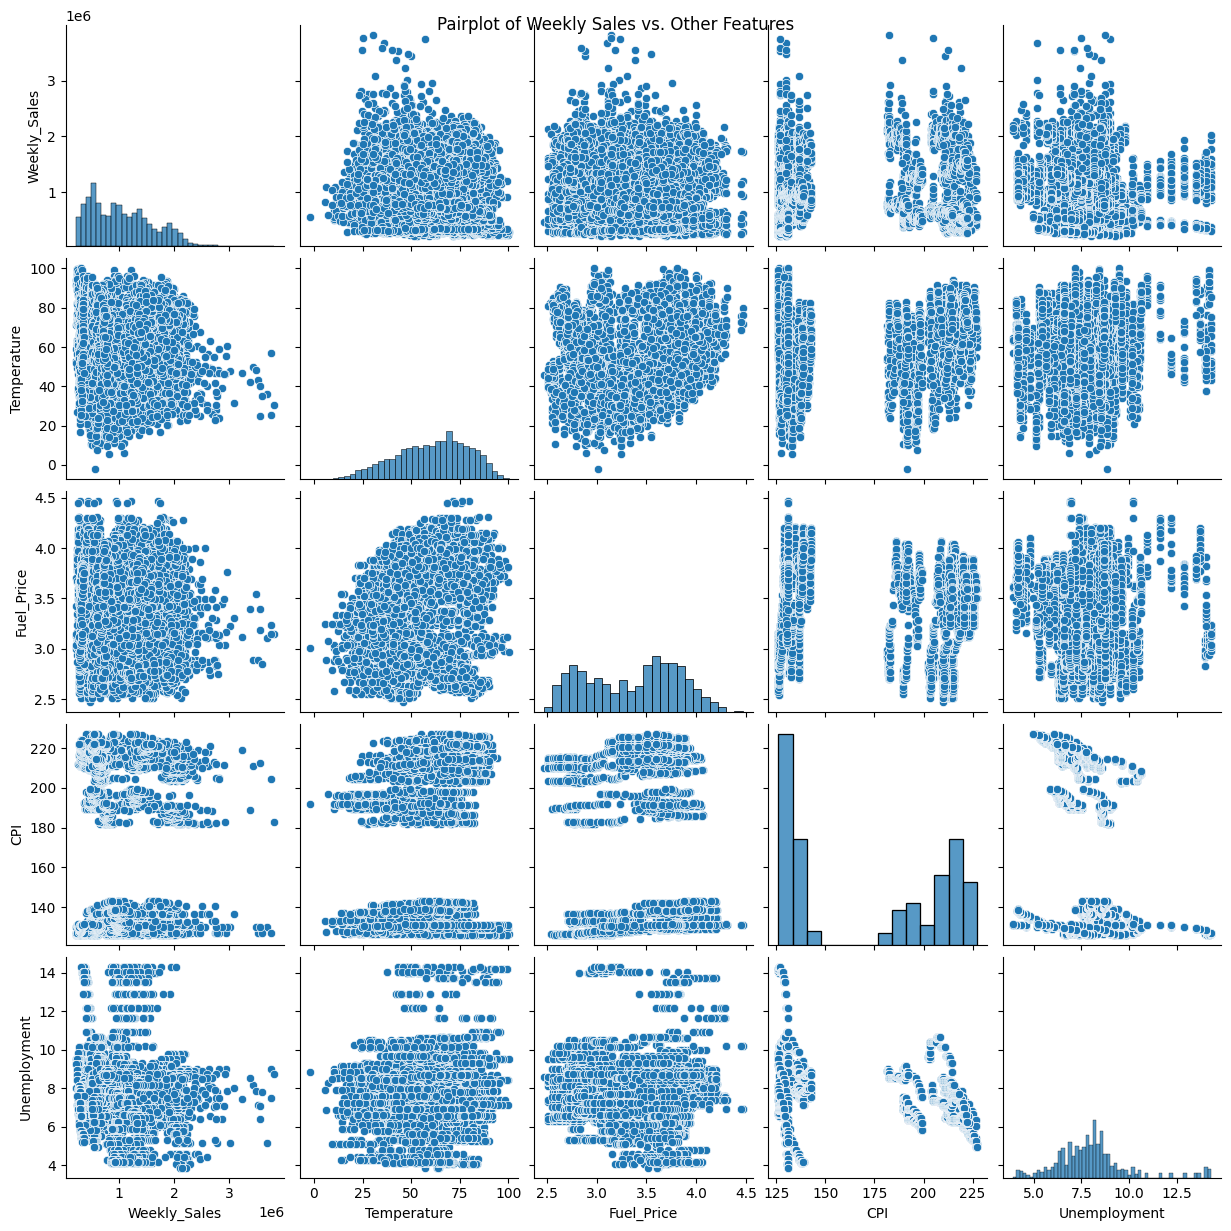

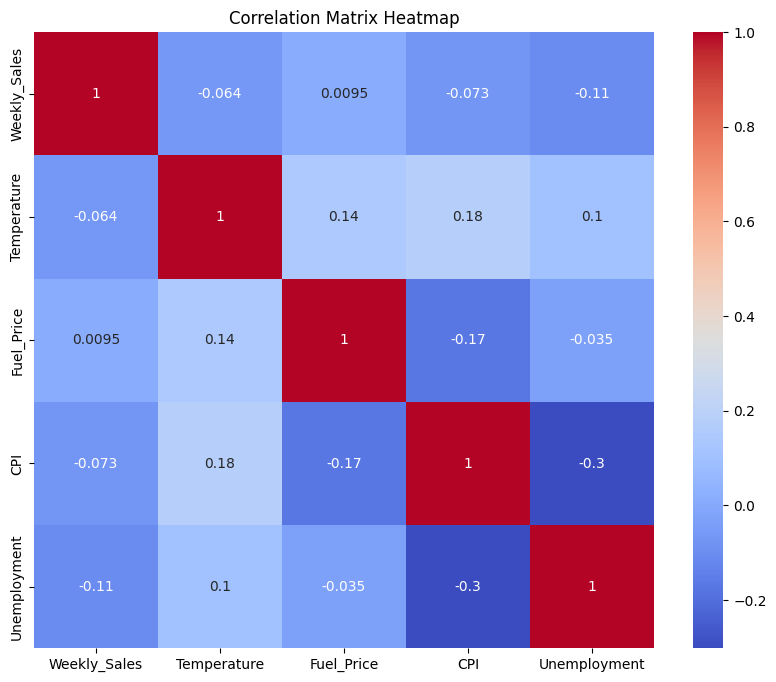

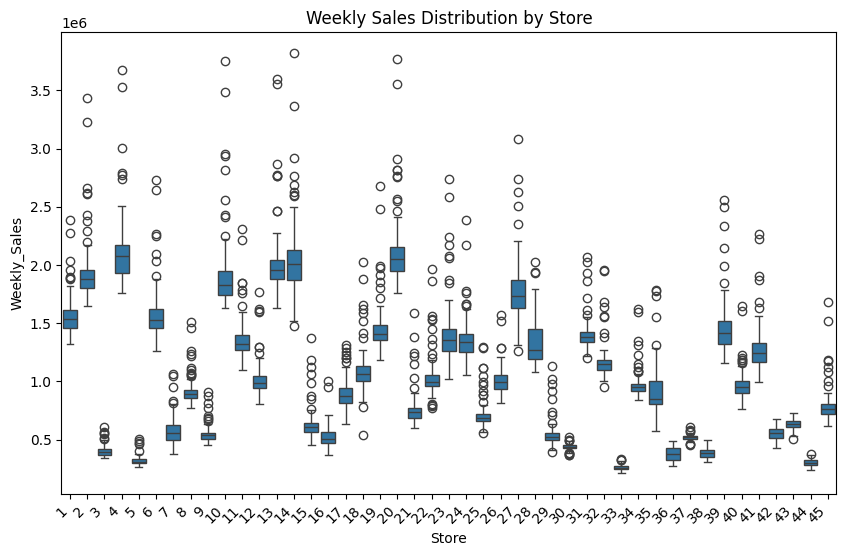

In [ ]:
# prompt: visualiza the data

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of Weekly Sales
plt.figure(figsize=(8, 6))
sns.histplot(data['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Weekly Sales and other features
plt.figure(figsize=(12, 8))
sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.suptitle('Pairplot of Weekly Sales vs. Other Features')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Boxplot of Weekly Sales by Store (or any categorical feature)
plt.figure(figsize=(10,6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data) # Replace 'Store' with your categorical feature
plt.title('Weekly Sales Distribution by Store')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

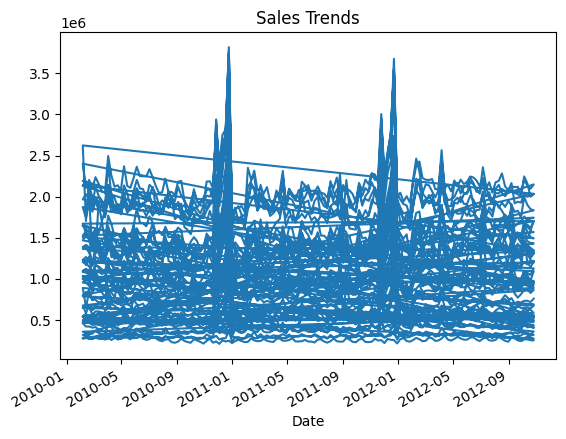

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Sales trends over time
# The original format was incorrect. Specifying the correct format 'DD-MM-YYYY'
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')  # Convert to datetime
data.set_index('Date')['Weekly_Sales'].plot(title="Sales Trends") # Changed 'Sales' to 'Weekly_Sales'
plt.show()

ARIMA - Mean Squared Error: 39007469872920.88
ARIMA - R-squared: -0.1600360377366019


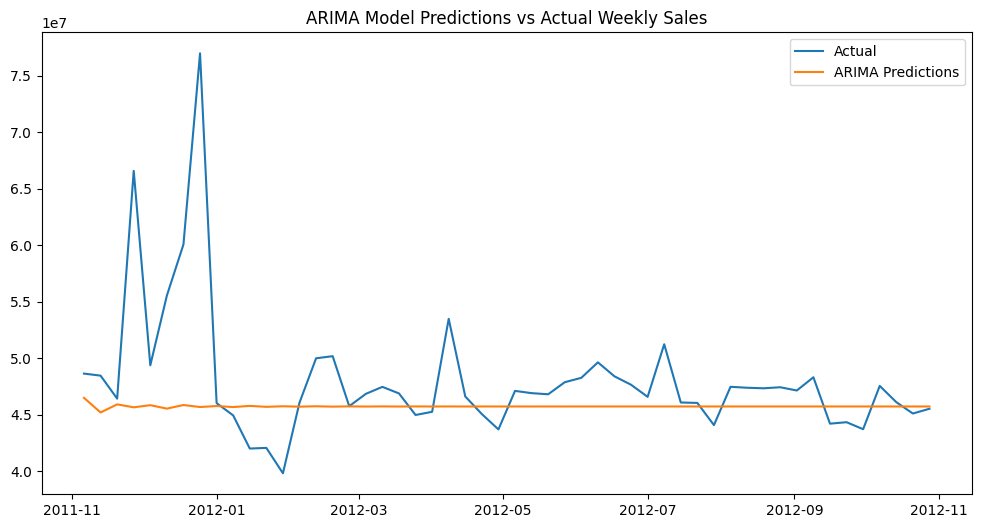

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX - Mean Squared Error: 890939208122072.2
SARIMAX - R-squared: -25.49547874345956


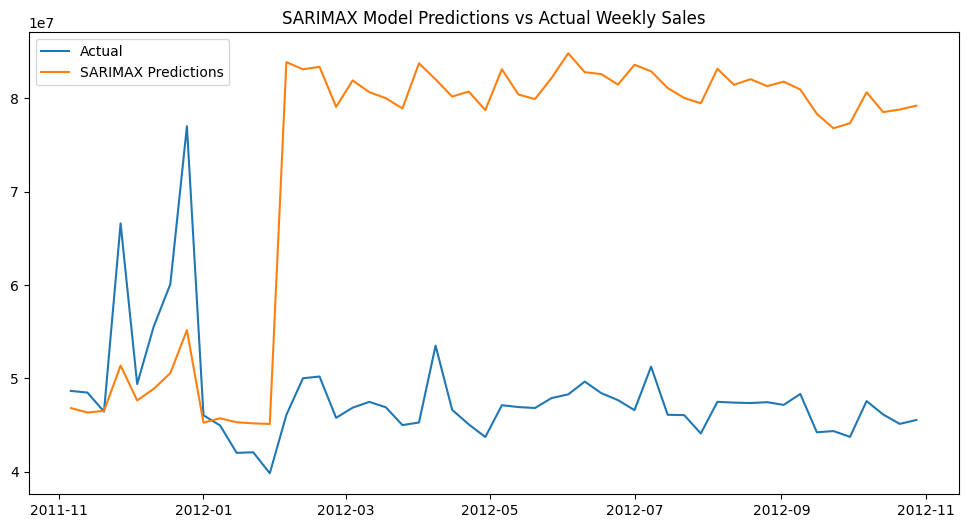

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = data.set_index('Date')
data_weekly = data.resample('W').sum()


# Split the data into training and testing sets for time series
train_data = data_weekly[:-52] # use last 52 weeks for testing
test_data = data_weekly[-52:]

# Fit an ARIMA model (adjust the order (p,d,q) as needed)
model = ARIMA(train_data['Weekly_Sales'], order=(5,1,0)) # Example order, tune this
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(data_weekly)-1)

# Evaluate the model
mse = mean_squared_error(test_data['Weekly_Sales'], predictions)
r2 = r2_score(test_data['Weekly_Sales'], predictions)

print(f"ARIMA - Mean Squared Error: {mse}")
print(f"ARIMA - R-squared: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data['Weekly_Sales'], label='Actual')
plt.plot(predictions, label='ARIMA Predictions')
plt.title('ARIMA Model Predictions vs Actual Weekly Sales')
plt.legend()
plt.show()


# Fit a SARIMAX model (adjust the order and seasonal order as needed)
# SARIMAX is generally better for time series with seasonality

model_sarimax = SARIMAX(train_data['Weekly_Sales'], order=(5,1,0), seasonal_order=(1,1,1,52))
model_sarimax_fit = model_sarimax.fit()
sarimax_predictions = model_sarimax_fit.predict(start=len(train_data), end=len(data_weekly)-1)

# Evaluate SARIMAX
mse_sarimax = mean_squared_error(test_data['Weekly_Sales'], sarimax_predictions)
r2_sarimax = r2_score(test_data['Weekly_Sales'], sarimax_predictions)

print(f"SARIMAX - Mean Squared Error: {mse_sarimax}")
print(f"SARIMAX - R-squared: {r2_sarimax}")

# Plot SARIMAX Results
plt.figure(figsize=(12, 6))
plt.plot(test_data['Weekly_Sales'], label='Actual')
plt.plot(sarimax_predictions, label='SARIMAX Predictions')
plt.title('SARIMAX Model Predictions vs Actual Weekly Sales')
plt.legend()
plt.show()